# Deep Learning A Z Boltzmann Machines - Redução de dimensionalidade

In [5]:
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [6]:
base = datasets.load_digits()
base

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
X = np.asarray(base.data, 'float32')

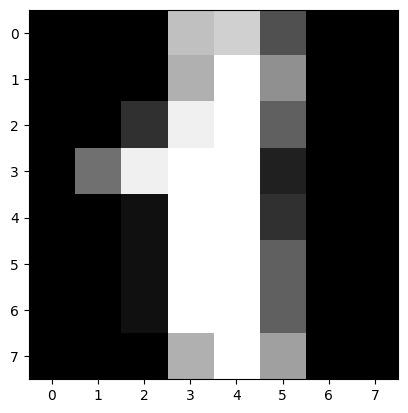

In [9]:
plt.imshow(X[1].reshape((8,8)), cmap='gray');

In [11]:
y = base.target
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
rbm = BernoulliRBM(random_state = 0)
rbm.n_iter = 25
rbm.n_components = 50
naive_rbm = GaussianNB()
classificador_rbm = Pipeline(steps = [('rbm', rbm), ('naive', naive_rbm)])
classificador_rbm.fit(X_treinamento, y_treinamento)

Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=50, n_iter=25, random_state=0)),
                ('naive', GaussianNB())])

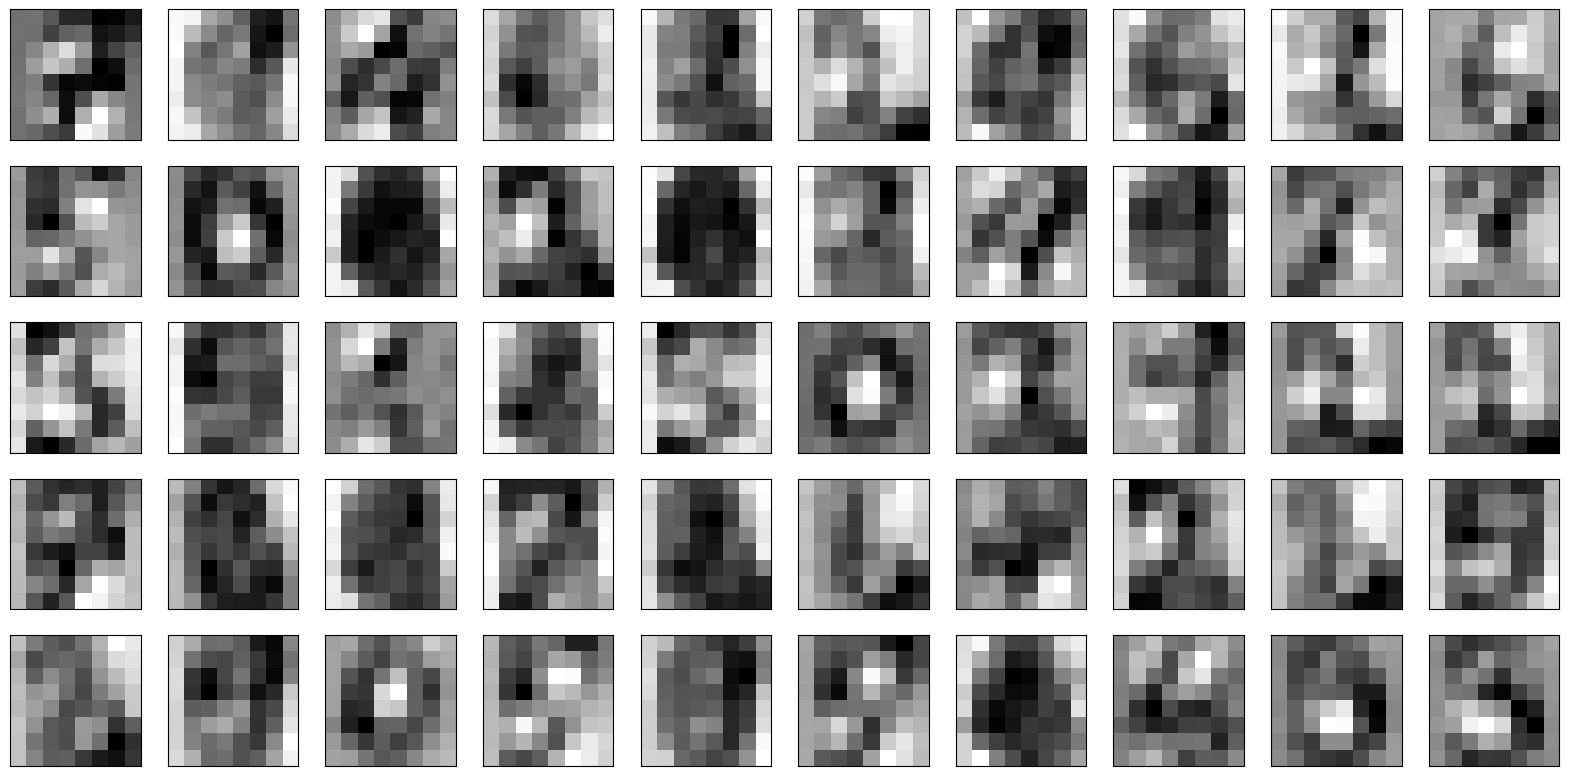

In [13]:
plt.figure(figsize = (20,20))
for i, componente in enumerate(rbm.components_):
  #print(i)
  #print(componente)
  plt.subplot(10, 10, i + 1)
  plt.imshow(componente.reshape((8,8)), cmap=plt.cm.gray_r)
  plt.xticks(())
  plt.yticks(())

In [18]:
previsoes_rbm = classificador_rbm.predict(X_teste)
metrics.accuracy_score(y_teste, previsoes_rbm)

0.8888888888888888

In [17]:
naive_simples = GaussianNB()
naive_simples.fit(X_treinamento, y_treinamento)
previsoes_naive = naive_simples.predict(X_teste)
metrics.accuracy_score(y_teste, previsoes_naive)

0.8111111111111111